# Setup

In [1]:
from torch_harmonics.spherical_harmonics_old import SphericalHarmonics

In [2]:
L = 2
sh = SphericalHarmonics(L, grid_type='grid', num_theta=180, num_phi=360)

# Plotting Spherical Harmonics

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch_harmonics import plotting

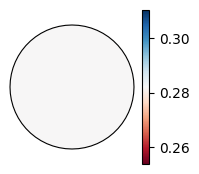

In [4]:
basis_fns = sh.Y
plotting.plot_spherical_fn(basis_fns[0,:,:].numpy(), fig=plt.figure(figsize=(2,2)))

In [5]:
basis_fns.shape

torch.Size([9, 360, 180])

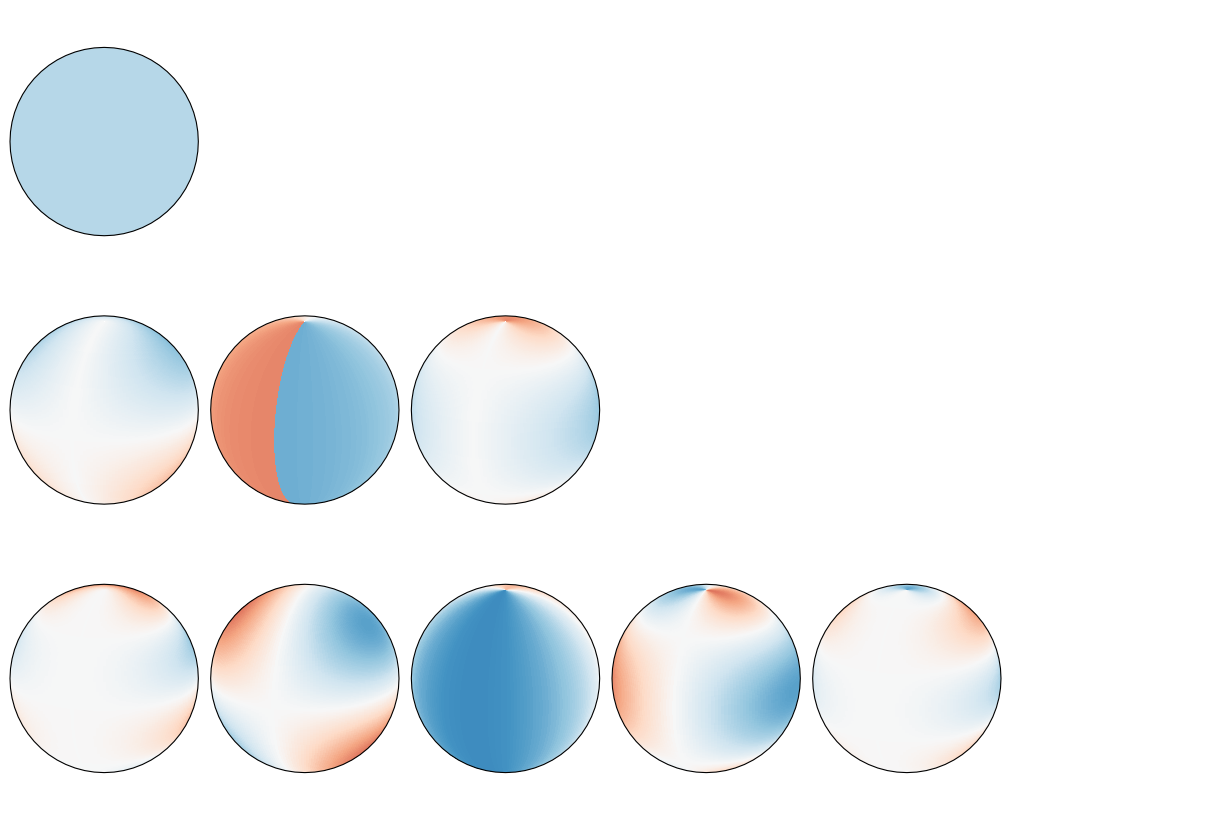

In [6]:
fig = plt.figure(layout='constrained', figsize=(12, 8))
subfigs = fig.subfigures(L+1, (L+1)*2)

irreps = np.arange(L+1)
ls = [[ls] * (2 * ls + 1) for ls in irreps]
ls = np.array([ll for sublist in ls for ll in sublist])  # 0, 1, 1, 1, 2, 2, 2, 2, 2, ...
ms = [list(range(-ls, ls + 1)) for ls in irreps]
ms = np.array([mm for sublist in ms for mm in sublist])  # 0, -1, 0, 1, -2, -1, 0, 1, 2, ...

for i in range(len(ls)):
        plotting.plot_spherical_fn(basis_fns[i,:,:], fig=subfigs[ls[i], ms[i]+ls[i]], colorbar=False, vmin=-1, vmax=1)

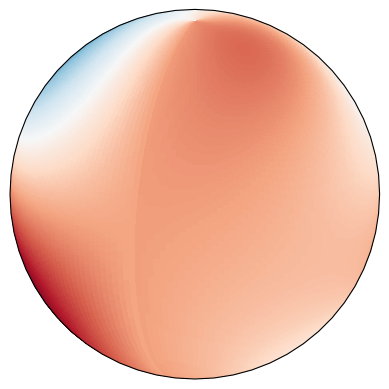

In [11]:
import torch
w = torch.distributions.uniform.Uniform(-1,1).sample([1,9]).view(1,1,-1)
plotting.plot_spherical_fn(sh(w)[0,0], colorbar=False, vmin=-1, vmax=1)